In [2]:
%load_ext autoreload
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
import random
import numpy as np
import sys
sys.path.append('../ecg')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import load
import json
import util

args = util.get_object_from_dict(data_path="../data")
dl = load.load(args, {})
print(dl.class_to_int)

0it [00:00, ?it/s]

Loading dataset...
Stratifying records...


22289it [00:01, 14100.13it/s]
  0%|          | 92/20067 [00:00<00:21, 912.52it/s]

Constructing Training Set...


  4%|▍         | 89/2222 [00:00<00:02, 883.58it/s]

Constructing Validation Set...


100%|██████████| 2222/2222 [00:02<00:00, 892.13it/s]


Length of training set 20067
Length of validation set 2222
Output dimension 15
{u'AFL': 1, u'WENCKEBACH': 14, u'NOISE': 7, u'SVT': 11, u'JUNCTIONAL': 6, u'AVB_TYPE2': 2, u'SUDDEN_BRADY': 10, u'TRIGEMINY': 12, u'PAUSE': 9, u'AFIB': 0, u'IVR': 5, u'VT': 13, u'BIGEMINY': 3, u'EAR': 4, u'NSR': 8}


In [8]:
x = dl.x_test
y = dl.y_test

def from_one_hot_to_int(label):
    return np.argmax(label, axis=-1)

def get_x_y_at_index(index):
    x_sample = x[index]
    y_sample = from_one_hot_to_int(y[index])
    return x_sample, y_sample

(2, 377)


<IPython.core.display.Javascript object>


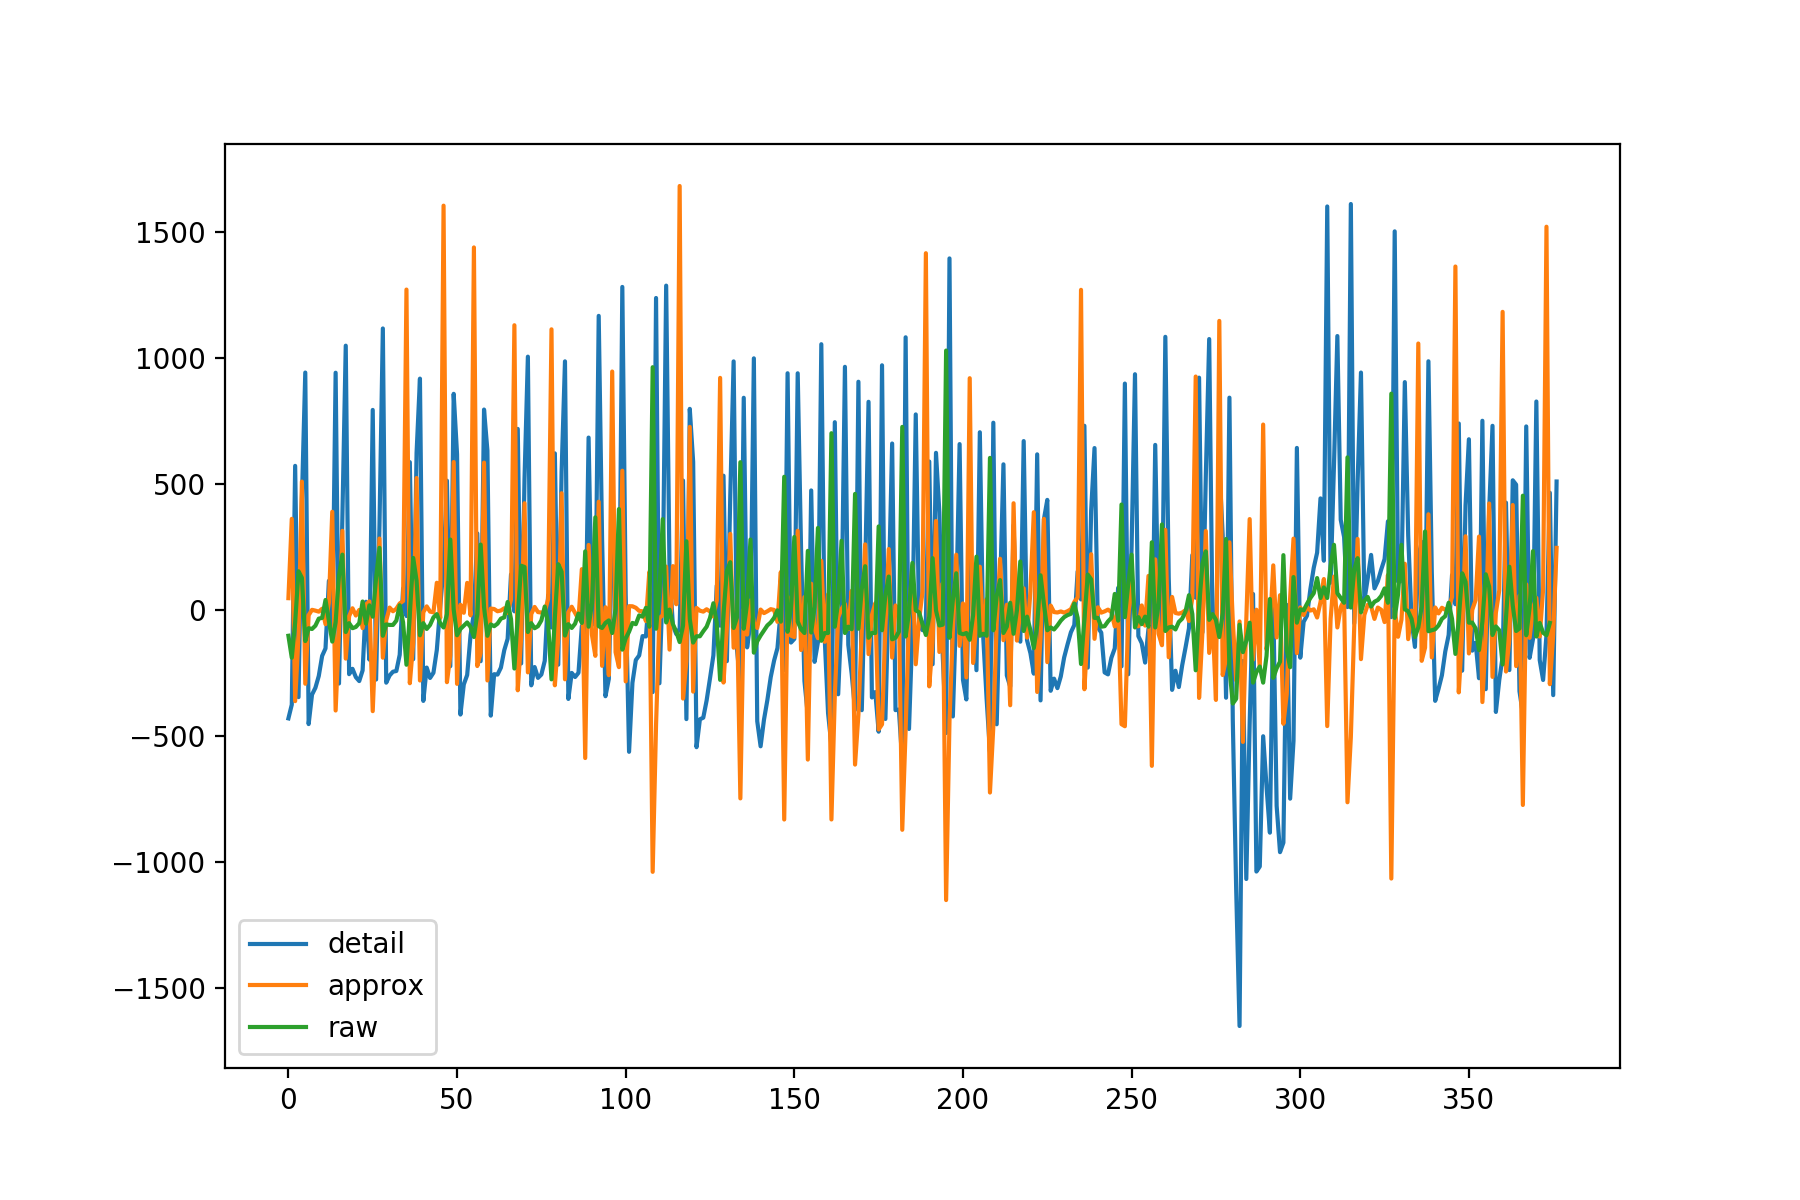

In [57]:
import pywt
level = 4
x_sample, y_sample = get_x_y_at_index(0)
coeffs = np.array(pywt.wavedec(x_sample, 'db2', level=level)[:2])
print(coeffs.shape)
plt.plot(coeffs[0], label='detail')
plt.plot(coeffs[1], label='approx')
plt.plot(x_sample[::2**level], label='raw')

plt.legend()
plt.show()